# Dark Souls 3 Weapons Data Analysis

Name: Omer Minhaj

Student ID: 100920230

# Introduction

Dark Souls 3 directed by Hidetaka Miyazaki in 2016 cemented itself as one of the best games ever made. It was produced by From Software who is most known for the souls-like genre which they single handedly created. The main premise of the game consists of it being extremely unforgiving and difficult but featuring a deep lore-rich story with some of the most beautiful moments in gaming history. Its intricate storytelling made huge ripples in the industry and changed the way people approached storytelling as a whole. However, an even greater reason for the game being so well received and idolized is its emphasis on a rich and deep weapons system. In the Kaggle data set chosen, there are a total of 287 unique weapons taken from the total weapons in the game, each featuring unique scaling attributes (Strength, Dexterity, Faith, Intelligence etc.), movesets, stat requirements and latent damage potential. Given the complexity of these mechanics and systems, understanding the relationship with scaling attributes and damage inflicted is key to mastering the game and overcoming each obstacle you face. Stat scaling is a unique mechanic you won’t find implemented this well anywhere else. The way it functions is that each weapon has an alphabetical grade corresponding to how well that weapon uses the stats you have leveled. A null (-) or D scaling is directly much worse than something with an A or B scaling. See the example attached:



![alt text](https://www.gamespot.com/a/uploads/scale_medium/1552/15524586/3044879-screen%20shot%202016-04-06%20at%2011.01.20%20am.jpg)

Image of Farron Greatsword taken from: https://www.gamespot.com/gallery/dark-souls-3-every-boss-weapon-so-far/2900-603/


---
- Point 1: the Farron Greatsword currently deals 125 damage as its base and adds on your stat scaling damage which is 110, meaning it has a 235 damage total.

- Point 2: Underneath the Attack Power we see an attribute bonus. The greatsword has a D in Strength, a C in Dexterity and null stats in Intelligence and Faith. Meaning you get more damage out of the weapon if you level dexterity, as opposed to if you leveled strength. 

- Point 3: Here we see our Stat requirements, this tells us how many levels we need to put into a specific stat to use the weapon effectively. If not utilized properly instead of adding stat scaling damage from Point 1 the game would subtract it instead, meaning you do much less damage

---

#### The question at hand: “What is the best total damage weapon and how do we progress to wield it?" 
By doing this, we can easily tell when we should swap to any given weapon and truly be able to progess through the game efficiently. Lastly, we will only be focussing on physical damage based weapons like swords, katanas etc. Magic usually has scaling included in spells alongside its caster, using two different spells with the same talisman for example, will give extremely different damage values. This analysis will include a variety of different statistical summaries, data on weapon aspects, and visual aid to help keep analysis organized.


## Neccessary Imports
We start by importing the neccessary libraries we need in order to run the code

In [1]:
import pandas as pd
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns

import csv

# Reading and Setting Data
Here we simply need to read all the data given in the set and transport it into the DS3_data variable for use later. We also check to see if the data is correct by printing out the first 5 values.

In [2]:
DS3_data = pd.read_csv("DS3_weapon.csv")

#Displaying the first 5 rows for clarity and to check if it works
DS3_data.head()

,Name,Category,Reinforcement,Damage,Damage Reduction,Aux Effects,Stat Requirements,Stat Bonuses,Critical,Weight,Stability,Durability,Sell Price,Spell Buff,Range,Buffable,Infusable
0,Fist,Fists,Regular,20/0/0/0/0,0/0/0/0/0,0/0/0,0/0/0/0,-/-/-/-,100,0.0,0,0,0.0,NaN,NaN,No,No
1,Dragonhead Shield,Small Shields,Boss,116/0/12/0/0,70/65/90/35/55,0/0/0,12/0/11/12,D/-/E/E,100,4.5,40,85,500.0,NaN,NaN,Yes,No
2,Dragonhead Greatshield,Greatshields,Boss,145/0/0/0/0,100/55/90/30/55,0/0/0,35/0/0/15,D/-/-/E,100,18.0,60,150,500.0,NaN,NaN,Yes,No
3,White Birch Bow,Bows,Unique,82/0/0/0/0,-/-/-/-/-,0/0/0,8/20/0/0,E/D/-/-,100,2.5,-,50,300.0,NaN,49.0,No,No
4,Preacher's Right Arm,Staves,Unique,109/0/0/0/0,25/20/10/10/15,0/0/0,12/0/14/0,E/-/A/-,100,2.0,10,50,300.0,229.0,NaN,No,No



# Columns Overview:
- Name: Weapon name.
- Category: Weapon type (e.g., Fists, Shields, etc.).
- Reinforcement: Reinforcement type (e.g., Regular, Unique, Boss).
- Damage: Damage values split into types (e.g., physical/magic/fire, etc.).
- Damage Reduction: Defense stats for shields.
- Aux Effects: Additional effects like bleed or poison.
- Stat Requirements: Requirements for Strength/Dexterity/Intelligence/Faith (split values).
- Stat Bonuses: Scaling stats for Strength/Dexterity/Intelligence/Faith.
- Critical: Multiplier for critical damage.
- Weight: Weight of the weapon.
- Stability: Shields' stability stats.
- Durability: Weapon durability.
- Sell Price: Value when sold.
- Spell Buff: Only for spellcasting weapons.
- Range: For ranged weapons.
- Buffable/Infusable: Whether the weapon can be buffed or infused.
---


# Cleanup
In our case we dont really need to look at any value in the table after our stat bonuses. So lets omit them and focus solely on values pertaining to damage and stats.

In [3]:
#removing stats we dont need at all 
#instead of removing it, i decided to just include the ones we did need.
DS3_Stat_cleaned = DS3_data[['Name', 'Category', 'Damage', 'Stat Requirements', 'Stat Bonuses', 'Critical', 'Aux Effects']]
DS3_Stat_cleaned.head()

,Name,Category,Damage,Stat Requirements,Stat Bonuses,Critical,Aux Effects
0,Fist,Fists,20/0/0/0/0,0/0/0/0,-/-/-/-,100,0/0/0
1,Dragonhead Shield,Small Shields,116/0/12/0/0,12/0/11/12,D/-/E/E,100,0/0/0
2,Dragonhead Greatshield,Greatshields,145/0/0/0/0,35/0/0/15,D/-/-/E,100,0/0/0
3,White Birch Bow,Bows,82/0/0/0/0,8/20/0/0,E/D/-/-,100,0/0/0
4,Preacher's Right Arm,Staves,109/0/0/0/0,12/0/14/0,E/-/A/-,100,0/0/0


---
##### One last thing we need to do is remove any weapon categories we wont be working on which i outlined in the introduction. Categories like Sheilds are useless as they arent designed to be used as weapon. Another thing we outlined is that if a weapons follows two different stat scalings ie. spells and the casting talismans and chimes or bows and arrows we dont want to include them. So lets do that here:

In [4]:
# here i decided to exclude caterogries instead of doing what I did before because there are a large amount of categories we do need.
exclude_categories = ['Normal Shields', 'Shields', 'Staves', 'Bows', 'Greatshields', 'Chimes', 'Small Shields','Bows','GreatBows','Torches', 'Talismans', 'Pyromancy Flames', 'Crossbows']

# removing the weapon categories that are obsolete.
DS3_data_cleaned = DS3_Stat_cleaned[~DS3_Stat_cleaned['Category'].isin(exclude_categories)]
DS3_data_cleaned.head()


,Name,Category,Damage,Stat Requirements,Stat Bonuses,Critical,Aux Effects
0,Fist,Fists,20/0/0/0/0,0/0/0/0,-/-/-/-,100,0/0/0
6,Ringed Knight Spear,Pikes,126/0/12/0/0,15/17/0/0,D/D/E/E,100,0/0/0
7,Ledo's Great Hammer,Great Hammers,170/0/0/0/0,60/0/0/0,B/-/-/-,100,0/0/0
8,Crucifix of the Mad King,Halberds,124/0/0/0/74,19/0/10/14,D/-/E/D,100,0/0/0
10,Lothric War Banner,Pikes,100/0/0/0/0,14/14/0/0,D/D/-/-,100,0/0/0


# Next Steps:
Now that we have got our data cleaned up, lets start coding up a few useful values we will need for analysis along with a few plots to visualize the data.

In [5]:
#Here we want to split out damage numbers which look like this right now:20/0/0/0/0	
#We want to split these up into their respective damage types such as Physical, Magic etc.
damage_types = ['Physical', 'Magic', 'Fire', 'Lightning', 'Dark']


#Here i got some output warning in vscode that told me to use .loc[from row index, to column index] however when I tried implementing it, the whole console crashed.
#However all the values have been properly placed
#Instead of using .loc i just made the dataslice a copy rather than editing the og data slice which I suppose worked very well also

# i asked GPT how to use .loc properly in my case but it gave me completely garbled up nonense so i opted into just making another copy
# of the data set 

# the prompt I gave was "How would I use .loc to assign specific values from a data set into by dataslice to work on. for example weapons from dark souls":
# data_slice = df.loc[row_labels, column_labels]
"""
    # Example DataFrame
import pandas as pd
data = {
    'Name': ['Weapon1', 'Weapon2', 'Weapon3'],
    'Damage': [150, 200, 300],
    'Weight': [5.0, 7.5, 10.0]
}
df = pd.DataFrame(data)

# Extract weapons with Damage > 150 into a slice
data_slice = df.loc[df['Damage'] > 150, ['Name', 'Damage']]
print(data_slice)

"""
# i didnt use it though because every time i would it would break


DS3_data_cleaned = DS3_data_cleaned.copy()
DS3_data_cleaned[damage_types] = DS3_data_cleaned['Damage'].str.split('/', expand=True).astype(float)

#Quick check to see if it works:
print("Check to see if we split the damage types up properly:\n")
print(DS3_data_cleaned[damage_types].head())

print("\n-------------------------------------------")

#Now lets add up the damage values to get a total base damage reading for each weapon:
print("\nTotal Damage for each weapon:\n")
DS3_data_cleaned['Total Damage'] = DS3_data_cleaned[damage_types].sum(axis=1)
print(DS3_data_cleaned[['Name', 'Total Damage']].head())


Check to see if we split the damage types up properly:

    Physical  Magic  Fire  Lightning  Dark
0       20.0    0.0   0.0        0.0   0.0
6      126.0    0.0  12.0        0.0   0.0
7      170.0    0.0   0.0        0.0   0.0
8      124.0    0.0   0.0        0.0  74.0
10     100.0    0.0   0.0        0.0   0.0

-------------------------------------------

Total Damage for each weapon:

                        Name  Total Damage
0                       Fist          20.0
6        Ringed Knight Spear         138.0
7        Ledo's Great Hammer         170.0
8   Crucifix of the Mad King         198.0
10        Lothric War Banner         100.0


---

Now we need to split the stat requirements as they are in the same format as the dsamage values we hadf earlier. We need to split them into spicific and independant values. To do this, we do basically the exact same thing we did for the damage values, except we add in a few more values to hold those numbers.

In [6]:
#Stat type requirements for our weapons
stat_req_types = ['Strength', 'Dexterity', 'Intelligence', 'Faith']

#This time it didnt tell me to use .loc, which to me seems kind of odd, but ive attached
DS3_data_cleaned = DS3_data_cleaned.copy() 
DS3_data_cleaned[stat_req_types] = DS3_data_cleaned['Stat Requirements'].str.split('/', expand=True).astype(float)

print("Check to see if we split the stat types up properly:\n")
print(DS3_data_cleaned[stat_req_types].head())

#we dont need to add anything up since tehy are independant values without any use of a total here

Check to see if we split the stat types up properly:

    Strength  Dexterity  Intelligence  Faith
0        0.0        0.0           0.0    0.0
6       15.0       17.0           0.0    0.0
7       60.0        0.0           0.0    0.0
8       19.0        0.0          10.0   14.0
10      14.0       14.0           0.0    0.0


---
# Graph Plotting and Analysis

#### Scatter Plot for Strength vs. Total Damage

Graph 1

Text(0, 0.5, 'Strength Requirement')

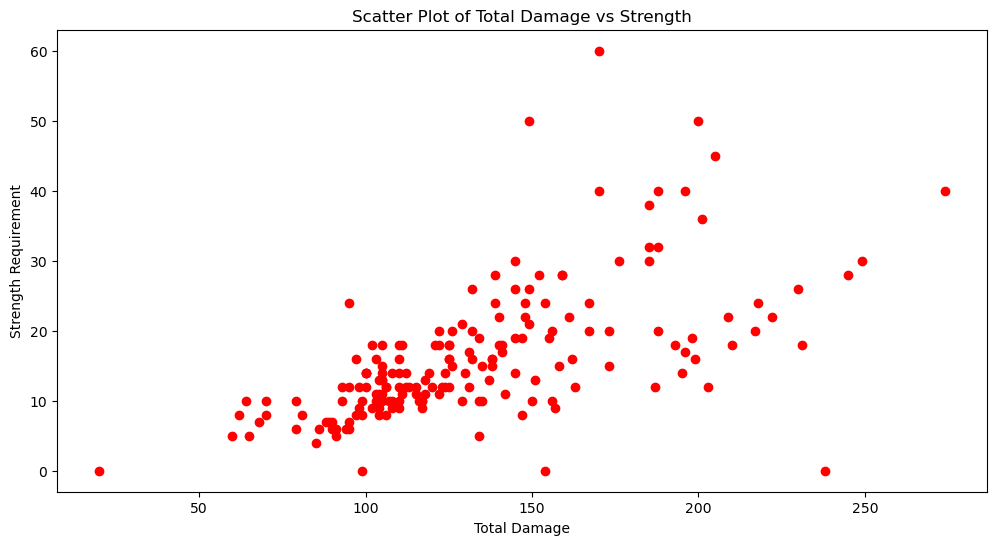

In [7]:
#First graph relating to how Strength Scalings Relate to Total Damage
plt.figure(figsize=(12, 6))
plt.scatter(DS3_data_cleaned['Total Damage'], DS3_data_cleaned['Strength'], label='Strength to Total Damage', color='red')

plt.title('Scatter Plot of Total Damage vs Strength')
plt.xlabel('Total Damage')
plt.ylabel('Strength Requirement')


Looking at this graph we can see that the majority of weapons in the game need strength as a stat to use the weapon to its fullest potential. This means most max damage totals for weapons require some strength to output.

---

#### Scatter Plot for Dexterity vs. Total Damage

Graph 2

Text(0, 0.5, 'Dexterity Requirement')

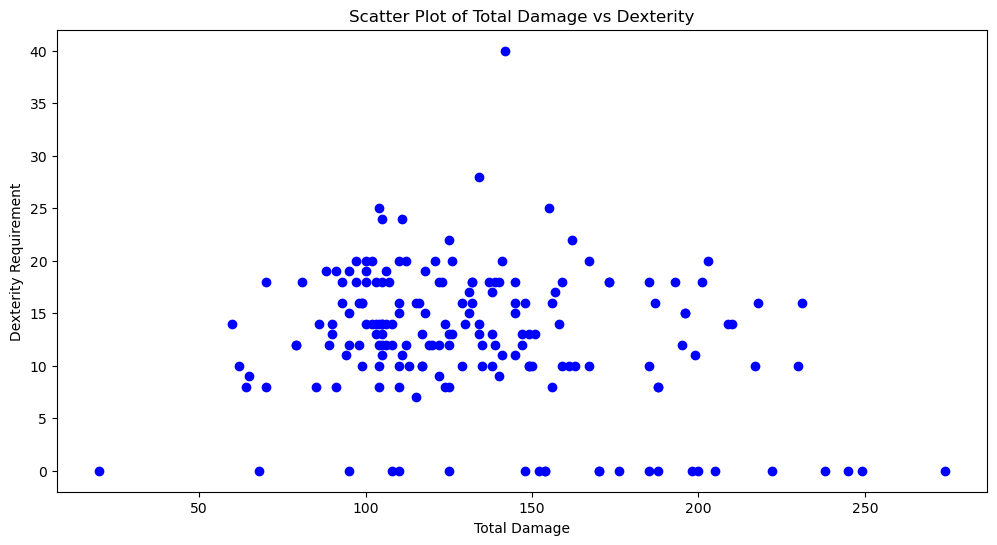

In [8]:
# copied strength graph and just swapped it over to dexterity
plt.figure(figsize=(12, 6))
plt.scatter(DS3_data_cleaned['Total Damage'], DS3_data_cleaned['Dexterity'], label='Dexterity to Total Damage', color='blue')

plt.title('Scatter Plot of Total Damage vs Dexterity')
plt.xlabel('Total Damage')
plt.ylabel('Dexterity Requirement')

Our strength and dexterity graphs look quite similar and thats for good reason. These two stats usually go hand in hand with eachother however, there are a lot more weapons in the dexterity graph that dont require you to level dex. This means that to get the easiest route to the most damage. You dont really need to focus on strength.

---

#### Scatter Plot for Faith vs. Total Damage
Graph 3

Text(0, 0.5, 'Faith Requirement')

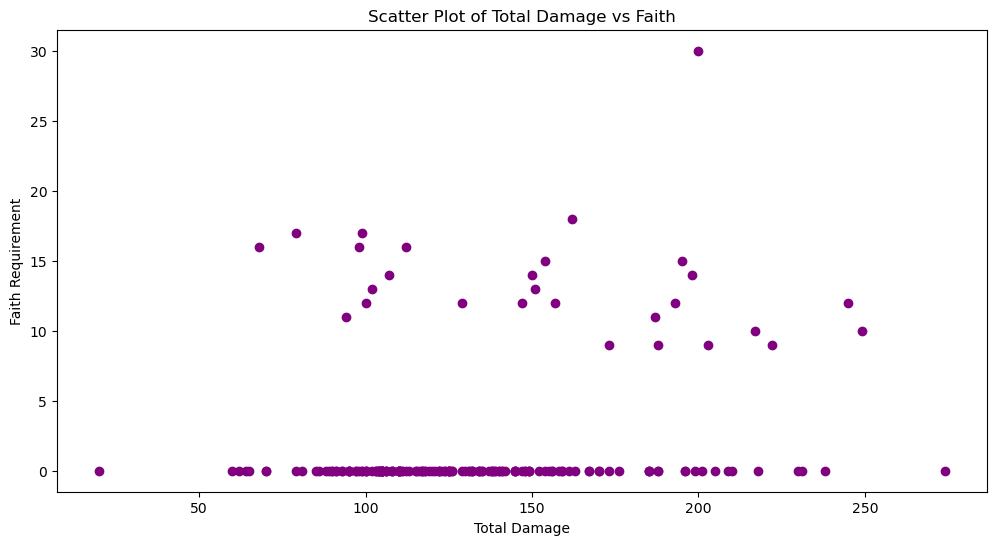

In [9]:

#literally just copied the old code and swapped it over to faith
plt.figure(figsize=(12, 6))
plt.scatter(DS3_data_cleaned['Total Damage'], DS3_data_cleaned['Faith'], label='Faith to Total Damage', color='purple')

plt.title('Scatter Plot of Total Damage vs Faith')
plt.xlabel('Total Damage')
plt.ylabel('Faith Requirement')

For faith we can see there are barely any weapons that need faith to weild properly. These would be refered to as "unique run weapons" used in very specific builds for a very specific style or purpose. What we can gather from this data is that you wouldn't usually want to level faith if youre specifically looking for maximum total base damage output. 

---

#### Scatter Plot for Total Damage vs Intelligence
Graph 4

Text(0, 0.5, 'Intelligence Requirement')

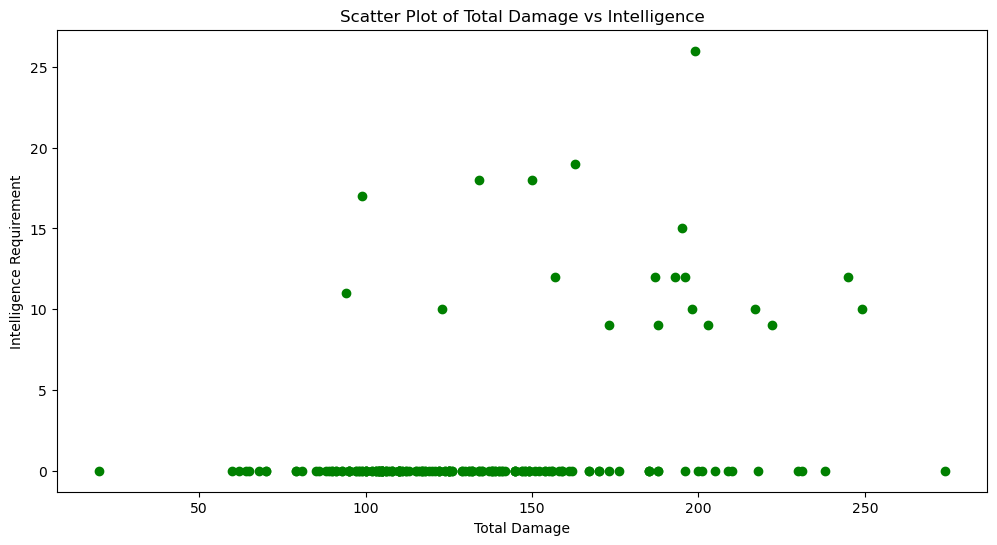

In [10]:
# copied again and just swapped to intelligence
plt.figure(figsize=(12, 6))
plt.scatter(DS3_data_cleaned['Total Damage'], DS3_data_cleaned['Intelligence'], label='Intelligence to Total Damage', color='green')

plt.title('Scatter Plot of Total Damage vs Intelligence')
plt.xlabel('Total Damage')
plt.ylabel('Intelligence Requirement')

The intelligence graph is arguably lesser in relevance when compared to faith. It's in the same situation as faith, you wouldn't look at leveling this stat in an everyday run for the same reason as stated earlier.

All of these graphs will help us in our discussion of our main question.

---

#### Bar Graph for Average Damage by Weapon Category
Graph 5

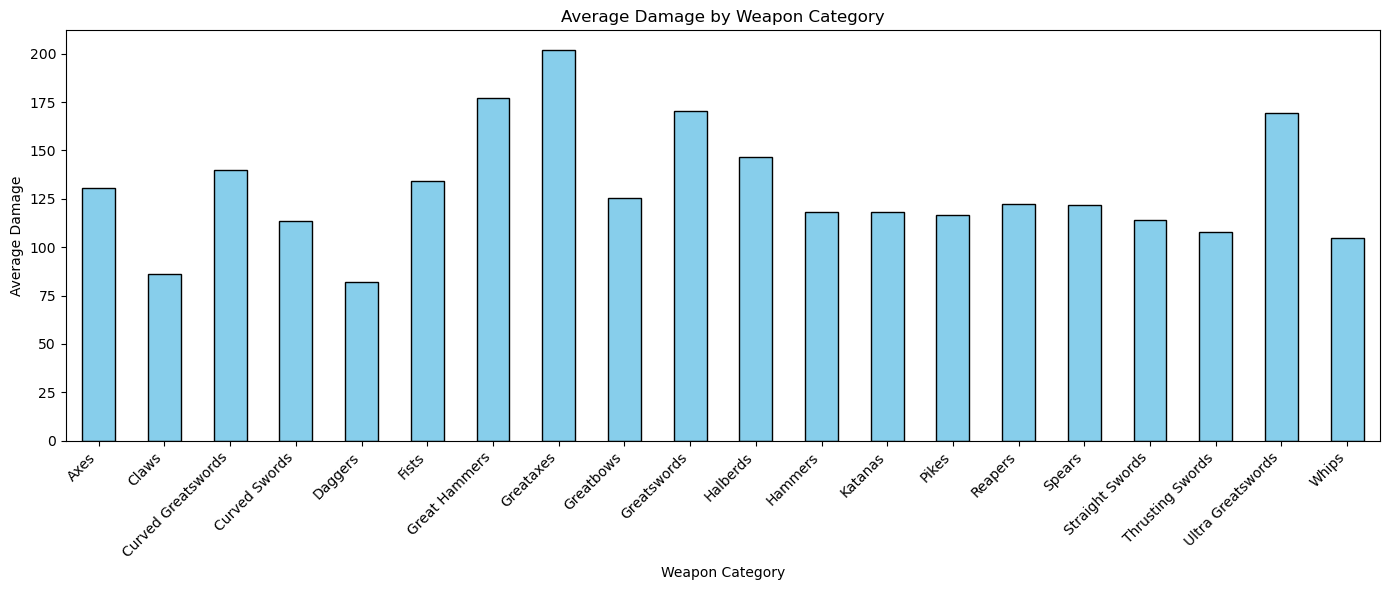

In [11]:
# simple average damage calculation. you just take the mean of your total damage in each category
category_avg_damage = DS3_data_cleaned.groupby('Category')['Total Damage'].mean()

#simple bar graph plot which i took from class
plt.figure(figsize=(14, 6))  
category_avg_damage.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Damage by Weapon Category')
plt.xlabel('Weapon Category')
plt.ylabel('Average Damage')

# this part I asked GPT about all it does is aligns the words at the bottom ad doesn't allow the names to overlap making it look odd.
# Prompt:

"""
Make the names at the bottom not overlap it looks completely off and hard to read.


plt.figure(figsize=(14, 6))  
category_avg_damage.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Damage by Weapon Category')
plt.xlabel('Weapon Category')
plt.ylabel('Average Damage')
plt.show()

"""
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

What we can see from this graph is that out of all weapon classes, greataxes on average output the most damage compared to any other weapon class. This also aligns with our strength graph as most if not all greataxes need high strength requirements.

---

#### Top 10 weapons with regards to stat SCALINGS.
Graph 6

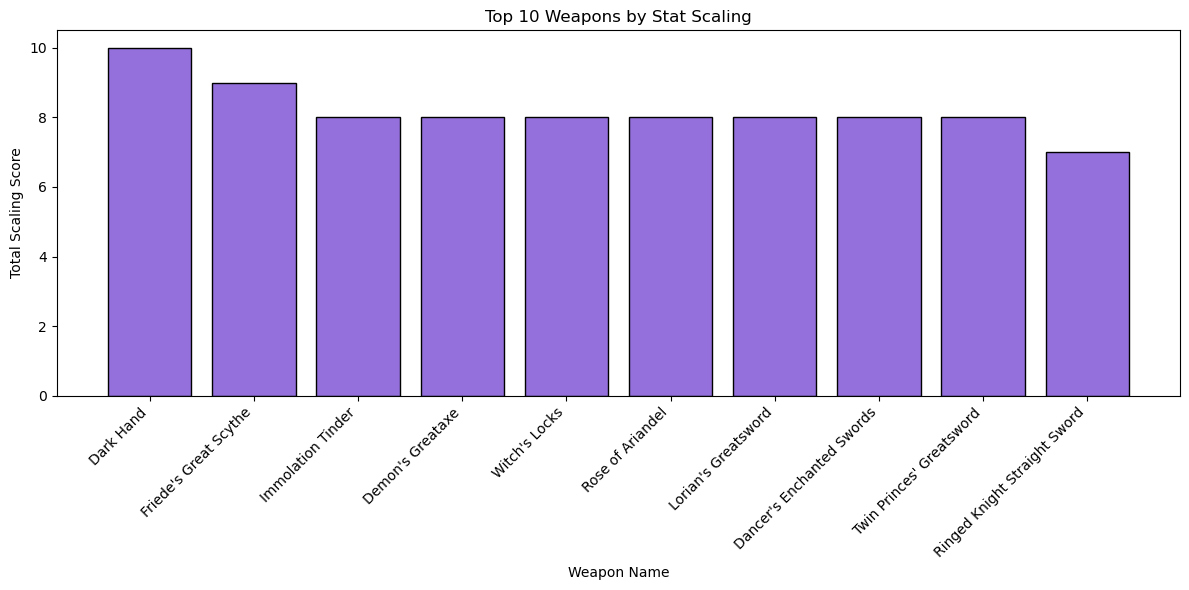

In [12]:
# The values we assigned to each letter grade
scaling_values = {'S': 6, 'A': 5, 'B': 4, 'C': 3, 'D': 2, 'E': 1, '-': 0}

# moving each scaling type from out data set into a dataslice to work on
# I didnt need to copy the data set like I did before, i assume this is because i have made new scaling values for each letter grade from the
# stat bonuses section of the data set.
DS3_data_cleaned['Strength_Scaling'] = DS3_data_cleaned['Stat Bonuses'].str[0].map(scaling_values)
DS3_data_cleaned['Dexterity_Scaling'] = DS3_data_cleaned['Stat Bonuses'].str[2].map(scaling_values)
DS3_data_cleaned['Intelligence_Scaling'] = DS3_data_cleaned['Stat Bonuses'].str[4].map(scaling_values)
DS3_data_cleaned['Faith_Scaling'] = DS3_data_cleaned['Stat Bonuses'].str[6].map(scaling_values)

# Simply just adding each stat number depending on where and what the grade is
DS3_data_cleaned['Total_Scaling'] = (
    DS3_data_cleaned['Strength_Scaling'] +
    DS3_data_cleaned['Dexterity_Scaling'] +
    DS3_data_cleaned['Intelligence_Scaling'] +
    DS3_data_cleaned['Faith_Scaling']
)

# sorting each by total scaling and we used head(10) to give the highest 10
top_scaling_weapons = DS3_data_cleaned.sort_values(by='Total_Scaling', ascending=False).head(10)

# ploting the bar graph, I basically just copied and pasted the one i used before
# I asked Chat GPT to make it look a little nicer though because it looked a little clustered and weird when i used this code
# Prompt to make the code better and old code:

"""
"Make this code look a little less clustered up and nicer looking"

plt.figure(figsize=(14, 6))  # Increase the figure width for better spacing
top_scaling_weapons.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Weapons for Stat Scaling')
plt.xlabel('Weapon names')
plt.ylabel('Total Scaling Score')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 
plt.show()
    
"""

plt.figure(figsize=(12, 6))
plt.bar(top_scaling_weapons['Name'], top_scaling_weapons['Total_Scaling'], color='mediumpurple', edgecolor='black')
plt.title('Top 10 Weapons by Stat Scaling')
plt.xlabel('Weapon Name')
plt.ylabel('Total Scaling Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Here we can see that out of the top 10 weapons the demon greataxe ranks within the top 4 of all weapons, which we have already seen has a prefereable stat requirement along with some of the highest total base damage in the game.

---

# Discussion
Overall our goal for the analysis of this data set is to find the best weapon to use for raw damage. From there we can extend out understanding of how the scalings work between weapons and what weapon would output the most damage and be the easist to pick up and use. 

Throughout the graphs we made, we can find some extrememly interesing trends and unique attributes of our analysis. Lets explore these further:

### 1. Stat Requirement Correlations (Graphs 1-4):

Strength: Our strength graph shows a very heavy grouping of weapons around the 100-150 damage range. Most of these weapons reside between the 10-15 stat requirement range aswell. These can be considered decent early to mid game weapons. You would usually sit around the 10-20 strength range until you can pivot to a higher damage weapon later. When looking for late game damage options, which is where you'll find the highest damage. We can consider that most of the higher end weapons on the graph reside in the 30-40 stat range, meaning that regardless of scalings you should aspire to achieve this stat range as quickly as possible

Dexterity: In our dexterity graph we do see a lot of good options from the same 10-20 stat range which we saw in our strength graph. However, the key difference is that most of the later game options dont require, or need extremely minimal stats assigned into dexterity. Another thing we can find is that there are overall, a lot less options to pivot into at any given point in the game. Thus, we can say that although some of these weapons might require inherent dex to wield, we should main that stat. In other words, we should think of strength before desterity when looking for the highest base damage.

Faith & Intelligence: The reason these two graphs are bunched in together is because we can see extremely similar trends which they both share. One of them being the extreme lack of weapons the need any of these two stats to wield. In our analysis we called these weapons extremely specific for a hyper specific reasoning to weild. Which is why we can confidently say that for the highest base damage achieved in the game, we wont need to level faith or intelligence a lot, if not at all.

---

### 2. What weapon class if the best for high damage runs?

Through our analysis of graph 5 we are able to understand what different types of weapons output the highest average damage in the game. Our reason for this extends off out stat requirements analysis. Here we can easily tell what weapons to use with the previously assigned stats. The highest damage weapon class obtained through analysis would be Greataxes. This works extremely well as we already outlined that strenght is the stat pivot we desire, greataxes directly scale and utilize strength as a main stat with minimal to no emphasis on dexterity.

Thus, we can say confidently that all in all, Greataxes are a good option for the entirety of the game. They deal heavy base damage which is amazing for early and mid stage of the game. However, one glaring question pops up: "If they have high base damage, are there any greataxes we can obtain that not only have high base damage, but also scale well later into the game?". 

---

### 3. The best weapon for our total damage build.

In our last graph (Graph 6), we dived a little further into the analysis and found the top 10 best weapons in the game with regardes to their alphabetical scalings. The way this graph works is that we assign a point system to each weapon, the higher the scaling, the more points we give to that weapon:

- S = 6
- A = 5
- B = 4
- C = 3
- D = 2
- E = 1
- null/- = 0

Through this system we can easily and efficiently tell what weapons rank the highest with scalings. The higher the points, the more viable these weapons are in the late game, where bosses have more health and resistances. Quickly running through what we found, we need to find a weapon that has main strength requirements, we  also established that greataxes have the highest average damage in the game and they also align with strength requirements, this means that by extension we need to find a greataxe that scales well in the late game.

Luckily, we have a solution. Presenting the Demon's Greataxe:

![alt text](https://static0.gamerantimages.com/wordpress/wp-content/uploads/2020/11/dark-souls-3-demons-greataxe.jpg)
Image taken from: https://gamerant.com/dark-souls-3-best-worst-axes/ 

This weapon falls in line perfectly with everything we desire in the highest total damage run. It has inherent strength attribute requirements,
it has extremely high base damage from those requirements, it is apart of the highest damage weapon class, and lastly it has the best scalings of its peers in the greataxes section.

---

### Conclusion

Through this analysis, we have not only determined the best weapon to use for the highest total damage in the game, but through extension we have also shown that strength is the most valuable stat and that greataxes, which are the highest average damage classes in the game utilize strength perfectly. The amalgamation of all this analysis bring us to the conclusion that Demon's Greataxe is the best total damage weapon in the game.

# References and Bibliography

opendatasets import: https://pypi.org/project/opendatasets/

Kaggle Dataset: https://www.kaggle.com/datasets/l3llff/-dark-souls-3-weapon

Pandas repository for .loc: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html 

